# DSCI 503 - Project 03
### Daniel Carter

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Part 1: Loading the Data Set; Preliminary Analysis

In this section we will load the data for the project and examine it a little bit

In [2]:
diamonds = pd.read_csv('diamonds.txt',sep='\t')
diamonds.head(10)

,carat,cut,color,clarity,depth,table,price,x,y,z
1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
6,0.24,Very Good,J,VVS2,62.8,57.0,336,3.94,3.96,2.48
7,0.24,Very Good,I,VVS1,62.3,57.0,336,3.95,3.98,2.47
8,0.26,Very Good,H,SI1,61.9,55.0,337,4.07,4.11,2.53
9,0.22,Fair,E,VS2,65.1,61.0,337,3.87,3.78,2.49
10,0.23,Very Good,H,VS1,59.4,61.0,338,4.00,4.05,2.39


Determine the size of the dataset

In [3]:
print(diamonds.shape)

(53940, 10)


We will now look at the distribution of the columns of the dataset

In [4]:
print(diamonds.describe())

              carat         depth         table         price             x  \
count  53940.000000  53940.000000  53940.000000  53940.000000  53940.000000   
mean       0.797940     61.749405     57.457184   3932.799722      5.731157   
std        0.474011      1.432621      2.234491   3989.439738      1.121761   
min        0.200000     43.000000     43.000000    326.000000      0.000000   
25%        0.400000     61.000000     56.000000    950.000000      4.710000   
50%        0.700000     61.800000     57.000000   2401.000000      5.700000   
75%        1.040000     62.500000     59.000000   5324.250000      6.540000   
max        5.010000     79.000000     95.000000  18823.000000     10.740000   

                  y             z  
count  53940.000000  53940.000000  
mean       5.734526      3.538734  
std        1.142135      0.705699  
min        0.000000      0.000000  
25%        4.720000      2.910000  
50%        5.710000      3.530000  
75%        6.540000      4.040000  


## Part 2: Filtering and Sorting

In this section we will filter and sort the data so it is ready to be used further down in the project

In [5]:
diamonds.filter(items=['price', 'carat', 'cut', 'color', 'clarity']).sort_values('price').head(5)

,price,carat,cut,color,clarity
1,326,0.23,Ideal,E,SI2
2,326,0.21,Premium,E,SI1
3,327,0.23,Good,E,VS1
4,334,0.29,Premium,I,VS2
5,335,0.31,Good,J,SI2


We will now view more info on the 5 least expensive diamonds 

In [6]:
diamonds.filter(items=['price', 'carat', 'cut', 'color', 'clarity']).sort_values('price').head(5)

,price,carat,cut,color,clarity
1,326,0.23,Ideal,E,SI2
2,326,0.21,Premium,E,SI1
3,327,0.23,Good,E,VS1
4,334,0.29,Premium,I,VS2
5,335,0.31,Good,J,SI2


We will now view more information on the 5 largest diamonds with an ideal cut

In [7]:
diamonds.filter(items=['price', 'carat', 'cut', 'color', 'clarity']).loc[diamonds['cut']=='Ideal'].sort_values('carat', ascending=False).head(5)

,price,carat,cut,color,clarity
24329,12587,3.50,Ideal,H,I1
24298,12545,3.22,Ideal,I,I1
26468,16037,3.01,Ideal,J,SI2
26745,16538,3.01,Ideal,J,I1
24785,13156,2.75,Ideal,D,I1


We will now look at the 5 largest diamonds with a fair cut

In [8]:
diamonds.filter(items=['price', 'carat', 'cut', 'color', 'clarity']).loc[diamonds['cut']=='Fair'].sort_values('carat', ascending=False).head(5)

,price,carat,cut,color,clarity
27416,18018,5.01,Fair,J,I1
27631,18531,4.50,Fair,J,I1
27131,17329,4.13,Fair,H,I1
23645,11668,3.65,Fair,H,I1
26432,15964,3.40,Fair,D,I1


## Part 3: Working with Categorical Variables

In this part we will create lists to specifiy order for each of the categorical columns

In [9]:
clarity_levels = ['SI2', 'SI1', 'VS2', 'VS1', 'VVS2', 'VVS1', 'I1', 'IF']
cut_levels = ['Fair', 'Good', 'Very Good', 'Ideal', 'Premium']
color_levels  = ['J', 'I', 'H', 'G', 'F', 'E', 'D']

We will now use these lists to communicate the correct order to Pandas

In [10]:
diamonds['clarity'] = pd.Categorical(diamonds['clarity'], clarity_levels)
diamonds['cut'] = pd.Categorical(diamonds['cut'], cut_levels)
diamonds['color'] = pd.Categorical(diamonds['color'], color_levels)

print(diamonds)

       carat        cut color clarity  depth  table  price     x     y     z
1       0.23      Ideal     E     SI2   61.5   55.0    326  3.95  3.98  2.43
2       0.21    Premium     E     SI1   59.8   61.0    326  3.89  3.84  2.31
3       0.23       Good     E     VS1   56.9   65.0    327  4.05  4.07  2.31
4       0.29    Premium     I     VS2   62.4   58.0    334  4.20  4.23  2.63
5       0.31       Good     J     SI2   63.3   58.0    335  4.34  4.35  2.75
...      ...        ...   ...     ...    ...    ...    ...   ...   ...   ...
53936   0.72      Ideal     D     SI1   60.8   57.0   2757  5.75  5.76  3.50
53937   0.72       Good     D     SI1   63.1   55.0   2757  5.69  5.75  3.61
53938   0.70  Very Good     D     SI1   62.8   60.0   2757  5.66  5.68  3.56
53939   0.86    Premium     H     SI2   61.0   58.0   2757  6.15  6.12  3.74
53940   0.75      Ideal     D     SI2   62.2   55.0   2757  5.83  5.87  3.64

[53940 rows x 10 columns]


Creating a list of named colors for use later

In [11]:
clarity_pal = ['red', 'blue', 'green', 'yellow', 'purple', 'orange', 'brown', 'cyan']
color_pal = ['red', 'blue', 'green', 'yellow', 'purple', 'orange', 'brown']
cut_pal = ['red', 'blue', 'green', 'yellow', 'purple']

## Part 4: Displaying Counts for Categorical Variables

Get counts of the number of diamonds in each category. We will start with cut

In [12]:
diamonds['cut'].value_counts().sort_index

<bound method Series.sort_index of Ideal        21551
Premium      13791
Very Good    12082
Good          4906
Fair          1610
Name: cut, dtype: int64>

Count number of diamonds for each level of color

In [13]:
diamonds['color'].value_counts().sort_index

<bound method Series.sort_index of G    11292
E     9797
F     9542
H     8304
D     6775
I     5422
J     2808
Name: color, dtype: int64>

Count number of diamonds for each level of clarity

In [14]:
diamonds['clarity'].value_counts().sort_index

<bound method Series.sort_index of SI1     13065
VS2     12258
SI2      9194
VS1      8171
VVS2     5066
VVS1     3655
IF       1790
I1        741
Name: clarity, dtype: int64>

## Part 5: Scatterplots of Price Against Carat

In this section we will use scatterplots to see the relationship between price and carats

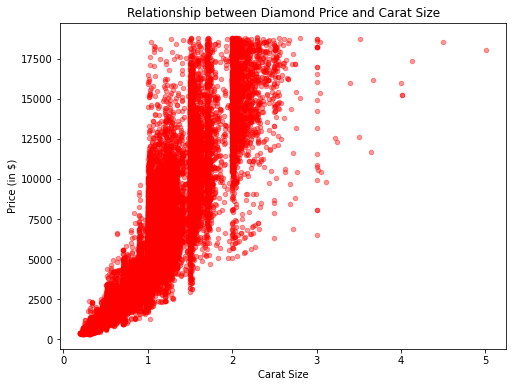

In [15]:
plt.figure(figsize=[8,6])
plt.scatter(diamonds['carat'], diamonds['price'], s=20,alpha=.4, c='red')
plt.xlabel('Carat Size')
plt.ylabel('Price (in $)')
plt.title('Relationship between Diamond Price and Carat Size')
plt.show()

Same graph but with the colors of the clarity


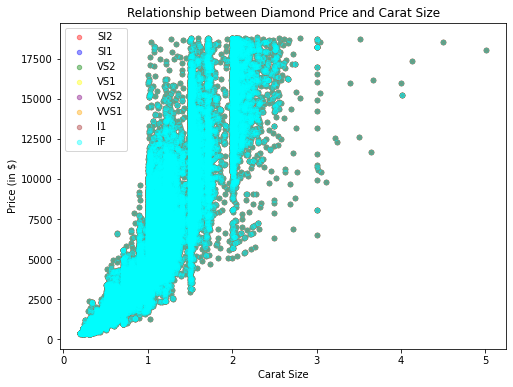

In [16]:
plt.figure(figsize=[8,6])

for level in range(len(clarity_levels)):
    plt.scatter(diamonds['carat'], diamonds['price'], s=20,alpha=.4, color=clarity_pal[level],label=clarity_levels[level])
plt.xlabel('Carat Size')
plt.ylabel('Price (in $)')
plt.title('Relationship between Diamond Price and Carat Size')
plt.legend()
plt.show()

Will now create subplots for each clarity option

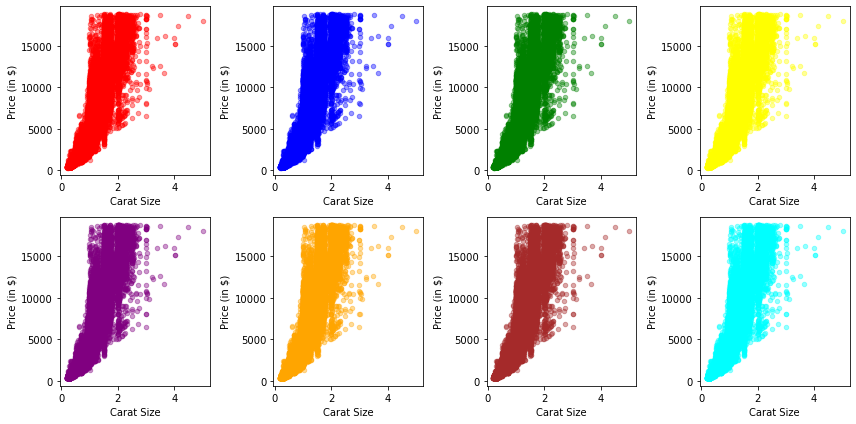

In [17]:
plt.figure(figsize=[12,6])

for level in range(len(clarity_levels)):
    plt.subplot(2,4,level+1)
    plt.scatter(diamonds['carat'], diamonds['price'], s=20,alpha=.4, color=clarity_pal[level],label=clarity_levels[level])
    plt.xlabel('Carat Size')
    plt.ylabel('Price (in $)')
    plt.xlim=[0,4]
    plt.ylim=[0,20000]
    plt.tight_layout()
plt.show()

## Part 6: Applying Logarithmic Transformations

Adding two new columns to store transformed variables

In [18]:
diamonds['ln_carat'] = np.log(diamonds['carat'])
diamonds['ln_price'] = np.log(diamonds['price'])

Use histograms to explore the distribution of the diamond prices and the log of the diamond prices

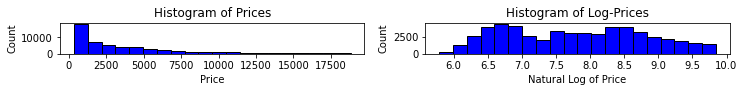

In [19]:
plt.figure(figsize=[12,4])
plt.subplot(6,2,1)
plt.hist(diamonds['price'], bins=20, edgecolor='black', color='blue')
plt.xlabel('Price')
plt.ylabel('Count')
plt.title('Histogram of Prices')

plt.subplot(6,2,2)
plt.hist(diamonds['ln_price'], bins=20, edgecolor='black', color='blue')
plt.xlabel('Natural Log of Price')
plt.ylabel('Count')
plt.title('Histogram of Log-Prices')

plt.show()

Use histograms to explore the distribution of the diamond carats and the log of the diamond carats

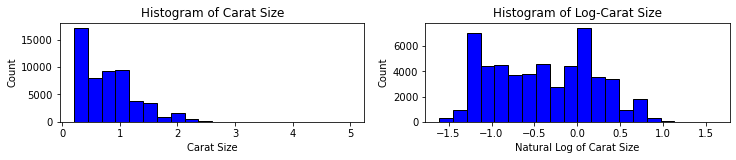

In [20]:
plt.figure(figsize=[12,4])
plt.subplot(2,2,1)
plt.hist(diamonds['carat'], bins=20, edgecolor='black', color='blue')
plt.xlabel('Carat Size')
plt.ylabel('Count')
plt.title('Histogram of Carat Size')

plt.subplot(2,2,2)
plt.hist(diamonds['ln_carat'], bins=20, edgecolor='black', color='blue')
plt.xlabel('Natural Log of Carat Size')
plt.ylabel('Count')
plt.title('Histogram of Log-Carat Size')

plt.show()

## Part 7: Scatterplot of Transformed Variables

We will create a scatter plot of the nl of price and carat

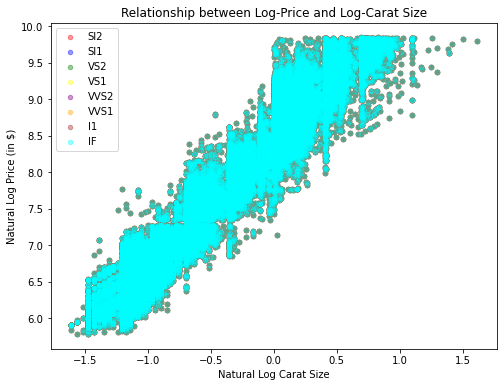

In [21]:
plt.figure(figsize=[8,6])

for level in range(len(clarity_levels)):
    plt.scatter(diamonds['ln_carat'], diamonds['ln_price'], s=20,alpha=.4, color=clarity_pal[level],label=clarity_levels[level])
plt.xlabel('Natural Log Carat Size')
plt.ylabel('Natural Log Price (in $)')
plt.title('Relationship between Log-Price and Log-Carat Size')
plt.legend()
plt.show()

## Part 8: Grouping by Cut

Create a grouped dataframe of mean price and carat size for each cut level

In [22]:
gb_cut = diamonds.filter(items=['cut', 'price', 'carat']).groupby('cut').mean().reset_index()
print(gb_cut)

         cut        price     carat
0       Fair  4358.757764  1.046137
1       Good  3928.864452  0.849185
2  Very Good  3981.759891  0.806381
3      Ideal  3457.541970  0.702837
4    Premium  4584.257704  0.891955


Use bar charts to graphically display the information from the groupby

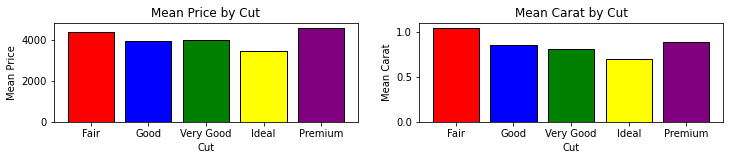

In [23]:
plt.figure(figsize=[12,4])
plt.subplot(2,2,1)
plt.bar(gb_cut['cut'], gb_cut['price'], edgecolor='black', color=cut_pal)
plt.xlabel('Cut')
plt.ylabel('Mean Price')
plt.title('Mean Price by Cut')
plt.subplot(2,2,2)
plt.bar(gb_cut['cut'], gb_cut['carat'], edgecolor='black', color=cut_pal)
plt.xlabel('Cut')
plt.ylabel('Mean Carat')
plt.title('Mean Carat by Cut')

plt.show()

## Part 9: Grouping by Color

Create a groupby dataframe showing mean price for each color level

In [24]:
gb_color = diamonds.filter(items=['color', 'price', 'carat']).groupby('color').mean().reset_index()

print(gb_color)

  color        price     carat
0     J  5323.818020  1.162137
1     I  5091.874954  1.026927
2     H  4486.669196  0.911799
3     G  3999.135671  0.771190
4     F  3724.886397  0.736538
5     E  3076.752475  0.657867
6     D  3169.954096  0.657795


Will now use bar charts to display the data

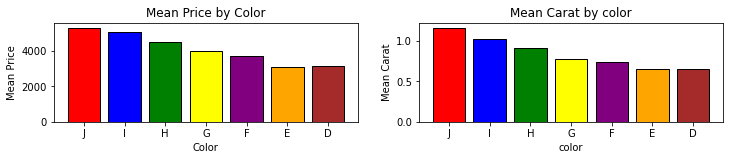

In [25]:
plt.figure(figsize=[12,4])
plt.subplot(2,2,1)
plt.bar(gb_color['color'], gb_color['price'], edgecolor='black', color=color_pal)
plt.xlabel('Color')
plt.ylabel('Mean Price')
plt.title('Mean Price by Color')
plt.subplot(2,2,2)
plt.bar(gb_color['color'], gb_color['carat'], edgecolor='black', color=color_pal)
plt.xlabel('color')
plt.ylabel('Mean Carat')
plt.title('Mean Carat by color')

plt.show()

## Part 10: Grouping by Clarity

Create a groubed dataframe showing mean price and carat size for each clarity level

In [26]:
gb_clarity = diamonds.filter(items=['clarity', 'price', 'carat']).groupby('clarity').mean().reset_index()

print(gb_clarity)

  clarity        price     carat
0     SI2  5063.028606  1.077648
1     SI1  3996.001148  0.850482
2     VS2  3924.989395  0.763935
3     VS1  3839.455391  0.727158
4    VVS2  3283.737071  0.596202
5    VVS1  2523.114637  0.503321
6      I1  3924.168691  1.283846
7      IF  2864.839106  0.505123


We will now show the information in a bar graph

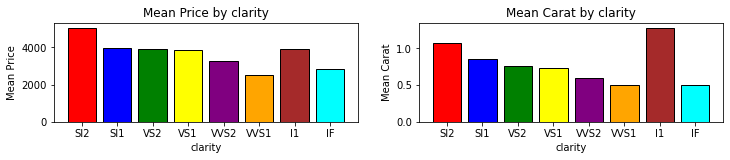

In [27]:
plt.figure(figsize=[12,4])
plt.subplot(2,2,1)
plt.bar(gb_clarity['clarity'], gb_clarity['price'], edgecolor='black', color=clarity_pal)
plt.xlabel('clarity')
plt.ylabel('Mean Price')
plt.title('Mean Price by clarity')
plt.subplot(2,2,2)
plt.bar(gb_clarity['clarity'], gb_clarity['carat'], edgecolor='black', color=clarity_pal)
plt.xlabel('clarity')
plt.ylabel('Mean Carat')
plt.title('Mean Carat by clarity')

plt.show()